In [7]:
import random

import cv2
import numpy as np 
from matplotlib import pyplot as plt

import gorillatracker.utils.cvat_import as cvat_import

# Helper functions provided in https://github.com/facebookresearch/segment-anything/blob/9e8f1309c94f1128a6e5c047a10fdcb02fc8d651/notebooks/predictor_example.ipynb
def show_sam_mask(mask, ax, color=np.array([30 / 255, 144 / 255, 255 / 255, 0.6])):
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_sam_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor="red", facecolor=(0, 0, 0, 0), lw=2))

def show_yolo_box(image_path, bbox_path):
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    with open(bbox_path, "r") as file:
        bboxes = file.readlines()
    
    for bbox in bboxes:
        class_id, x_center, y_center, bbox_width, bbox_height = map(float, bbox.split()[:5])
        x_min = int((x_center - bbox_width / 2) * width)
        y_min = int((y_center - bbox_height / 2) * height)
        x_max = int((x_center + bbox_width / 2) * width)
        y_max = int((y_center + bbox_height / 2) * height)

        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

In [8]:
base_path = "/workspaces/gorillatracker/data/ground_truth/cxl"
cvat_path = f"{base_path}/full_images_body_instance_segmentation/cvat_export.xml"
img_path = f"{base_path}/full_images/"
segmented_gorilla_images = cvat_import.cvat_import(cvat_path, img_path)

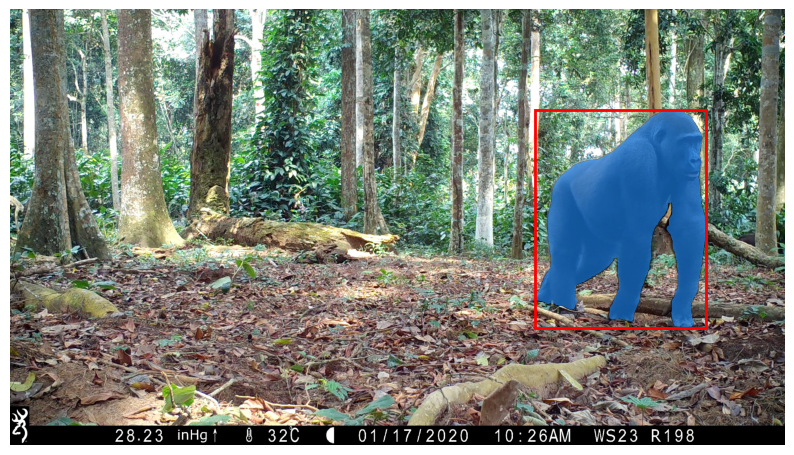

In [9]:
segmented_gorilla_image = random.choice(segmented_gorilla_images) 

gorilla_image = cv2.imread(segmented_gorilla_image.path)
gorilla_image = cv2.cvtColor(gorilla_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(gorilla_image)
plt.axis("off")
for class_label, segments in segmented_gorilla_image.segments.items():
    for mask, box in segments:
        show_sam_box(box, plt.gca())
        show_sam_mask(mask, plt.gca())
plt.show()

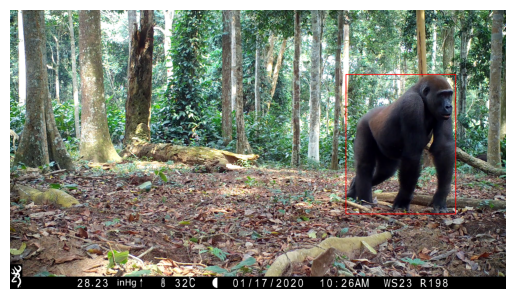

In [10]:
filename = segmented_gorilla_image.path.split("/")[-1].split(".")[0]
bbox_path = f"{base_path}/full_images_body_bbox/{filename}.txt"
show_yolo_box(segmented_gorilla_image.path, bbox_path)

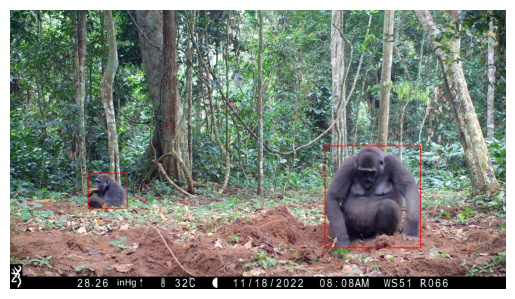

In [12]:
filename = "AP03_R066_20221118_155cFort"
bbox_path = f"/workspaces/gorillatracker/data/derived_data/cxl/yolov8n-gorillabody/body_bbox/{filename}.txt"
show_yolo_box(f"{img_path}/{filename}.png", bbox_path)
